In [35]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import math 
import sys
sys.path.append("../../")
import mchlearn.mixture as mix
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams["animation.html"] = "jshtml"
print("DONE")

DONE


The wicked stepmother has ordered Cinderella to separate a mixture of different ingredients including _i.a._ lentils and ashes. The actual number of ingredients is unknown to poor Cinderella. Fortunately, Cinderella being good and kind has many friends. One of them working in "Birds inc." company lent her the newest model of "Dove" scanner that can measure the diameter of the particles. Using it Cinderella gathered a list containing the diameter of each particle in the mixture. Knowing that for each kind of particles the diameter distribution is normal, she separated the mixture into different ingredients.

Data gathered by  Cinderella can be found in file "data/mixture.txt"

In [36]:
data = np.loadtxt('data/mixture.txt')
print(data)

[1.15462038 1.4846258  1.85954399 ... 0.80692936 1.117645   1.08439352]


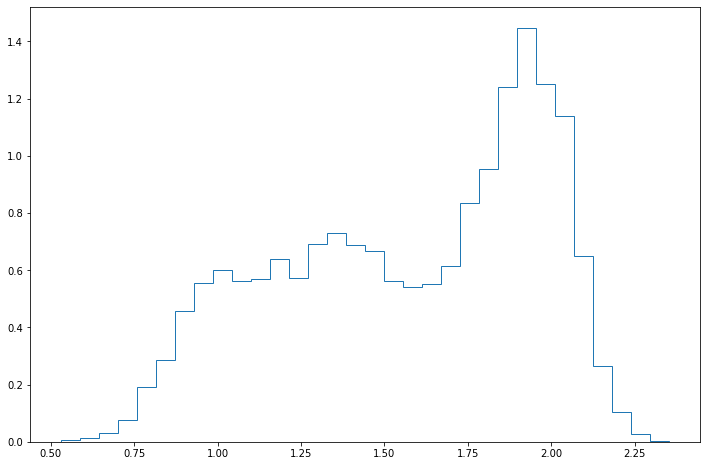

In [37]:
plt.hist(data,bins=32, histtype='step', density=True);

## Problem

Please redo her analysis. Estimate the number of ingredients in the mixture. Then classify each particle.

-----------------------------------------------------
----Data classification for different n_clusters:----
-----------------------------------------------------


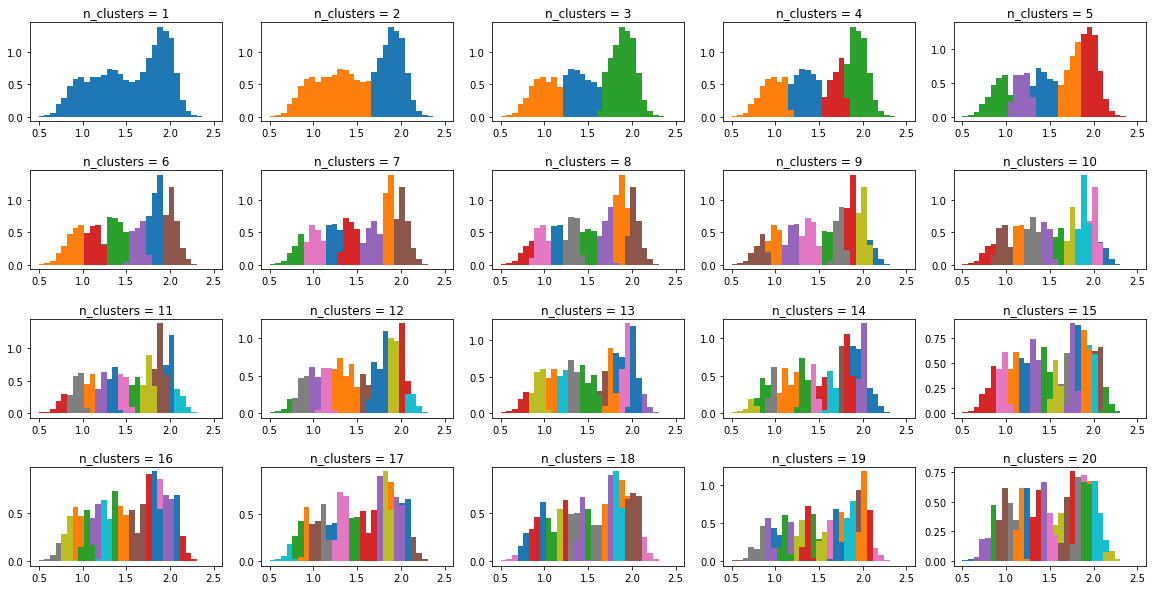

DONE


In [38]:
data=data.reshape(-1,1)
train, test = train_test_split(data, test_size=0.2)

gmms = [GaussianMixture(n_components=i, tol=1e-4, max_iter=500, n_init=3) for i in range(1,21)]
cvs =  [cross_validate(gm, train, y=None, cv=5) for gm in gmms]

fig, axs = plt.subplots(4, 5, figsize=(20, 10))

print("-----------------------------------------------------")
print("----Data classification for different n_clusters:----")
print("-----------------------------------------------------")

for i, gm in enumerate(gmms):
    gm.fit(train)
    pred = gm.predict(data)
    for k in np.unique(pred):
        axs[math.floor(i/5)%4, i%5].fill_between(np.linspace(0.5,2.5,32),np.histogram(data[pred == k],bins=np.linspace(0.5,2.5,33),density=True)[0]*np.mean(pred == k),step='pre') 
    axs[math.floor(i/5)%4, i%5].set_title("n_clusters = {nc}".format(nc=i+1))

plt.subplots_adjust(hspace=0.5)
plt.show()
print("DONE")

---------------------------------------------------------------
--Gaussian ditributions of diameters of data from n_clusters:--
---------------------------------------------------------------


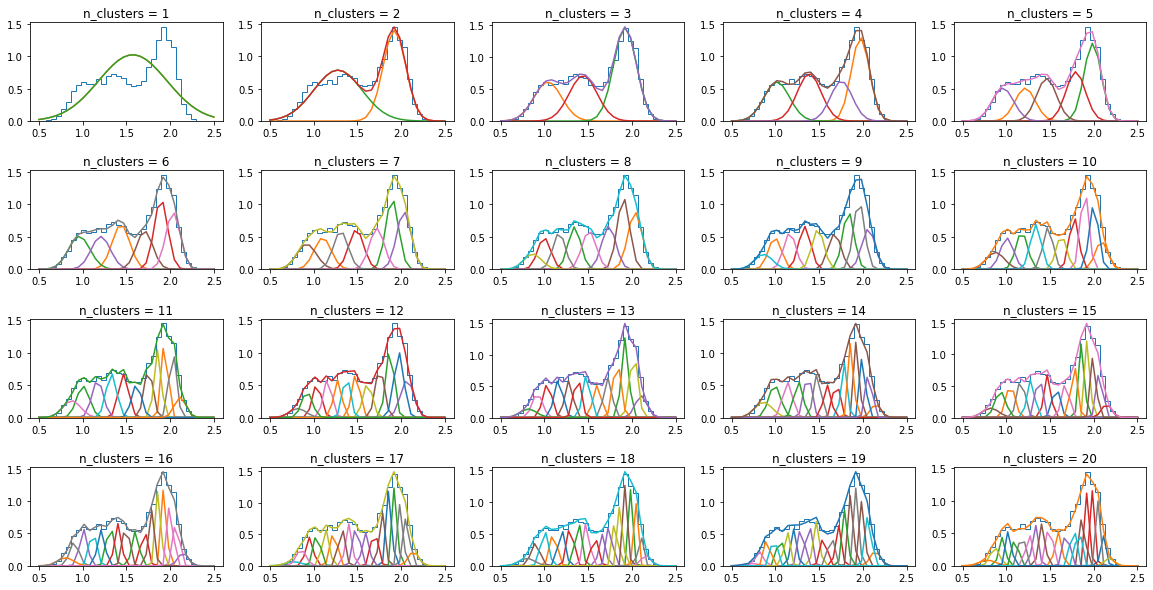

In [39]:
fig, axs = plt.subplots(4, 5, figsize=(20, 10))

print("---------------------------------------------------------------")
print("--Gaussian ditributions of diameters of data from n_clusters:--")
print("---------------------------------------------------------------")

for i, gm in enumerate(gmms):
    gm.fit(train)
    pred = gm.predict(data)
    
    mixture = mix.Gaussian1D.FromGaussianMixture(gm)
    axs[math.floor(i/5)%4,i%5].hist(data, bins=32, density=True, histtype='step');
    axs[math.floor(i/5)%4,i%5].plot(np.linspace(0.5,2.5,32),mixture.pdf(np.linspace(0.5,2.5,32), sep=True));
    axs[math.floor(i/5)%4,i%5].plot(np.linspace(0.5,2.5,32),mixture.pdf(np.linspace(0.5,2.5,32)));
    axs[math.floor(i/5)%4,i%5].set_title("n_clusters = {nc}".format(nc=i+1))

plt.subplots_adjust(hspace=0.5)
plt.show()

-----------------------
THE BEST n_clusters:

nnl cv   : 4 nnlcv = 0.3185
aic train: 4 aic_train = 0.3184
bic train: 4 bic_train = 0.3232
nnl train: 19 nnl_train = 0.3156
nnl test : 11 nnl_test = 0.3063

---just to compare-----
nnl_train[np.min(aic_train)] = 0.3171
nnl_test[np.min(aic_train)] = 0.3072
nnl_train[np.min(bic_train)] = 0.3171
nnl_test[np.min(bic_train)] = 0.3072
-----------------------
DONE


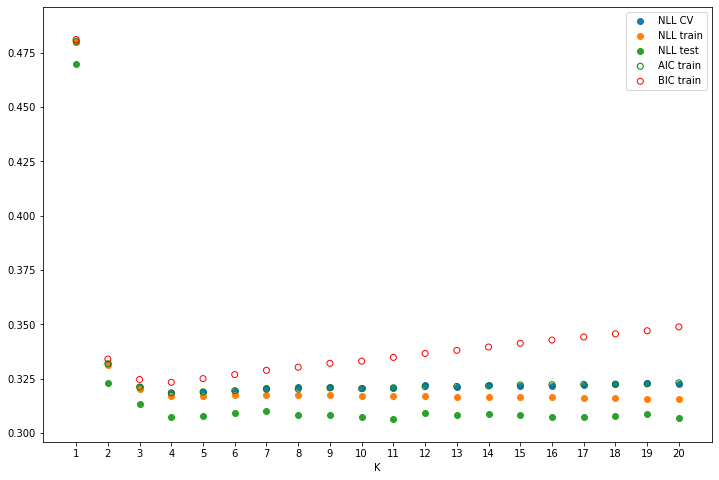

In [40]:
n_samples = len(train)
nnlcv = [-c['test_score'].mean() for c in cvs]
gm_train = [-gm.score(train) for gm in gmms]
gm_test = [-gm.score(test) for gm in gmms]
aic_train = [0.5*gm.aic(train)/n_samples for gm in gmms]
bic_train = [0.5*gm.bic(train)/n_samples for gm in gmms]


plt.scatter(np.arange(1,21), nnlcv, label='NLL CV');
plt.scatter(np.arange(1,21), gm_train, label='NLL train');
plt.scatter(np.arange(1,21), gm_test, label='NLL test');
plt.scatter(np.arange(1,21), aic_train, label='AIC train', facecolor='none', edgecolors='green');
plt.scatter(np.arange(1,21), bic_train, label='BIC train', facecolor='none', edgecolors='red');

plt.xticks(np.arange(1,21));
plt.xlabel("K");
plt.legend();

print("-----------------------")
print("THE BEST n_clusters:\n")
print("nnl cv   :",np.argmin(nnlcv)+1,"nnlcv = {:.4f}".format(nnlcv[np.argmin(nnlcv)]))
print("aic train:",np.argmin(aic_train)+1,"aic_train = {:.4f}".format(aic_train[np.argmin(aic_train)]))
print("bic train:",np.argmin(bic_train)+1,"bic_train = {:.4f}".format(bic_train[np.argmin(bic_train)]))
print("nnl train:",np.argmin(gm_train)+1,"nnl_train = {:.4f}".format(gm_train[np.argmin(gm_train)]))
print("nnl test :",np.argmin(gm_test)+1,"nnl_test = {:.4f}".format(gm_test[np.argmin(gm_test)]))

print("\n---just to compare-----")
print("nnl_train[np.min(aic_train)] = {:.4f}".format(gm_train[np.argmin(aic_train)]))
print("nnl_test[np.min(aic_train)] = {:.4f}".format(gm_test[np.argmin(aic_train)]))
print("nnl_train[np.min(bic_train)] = {:.4f}".format(gm_train[np.argmin(bic_train)]))
print("nnl_test[np.min(bic_train)] = {:.4f}".format(gm_test[np.argmin(bic_train)]))
print("-----------------------")
print("DONE")  

In [41]:
#I am choosing the best index based on nnl_cv, aic, bic
print("nnl cv:", np.argmin(nnlcv)+1, "|| aic train:", np.argmin(aic_train)+1, "|| bic train:", np.argmin(bic_train)+1)

best_n_clusters=np.argmin(nnlcv)

nnl cv: 4 || aic train: 4 || bic train: 4


### Bonus question

Not knowing the real labels, how can you estimate  the accuracy of this classifier ? 

In [42]:
silhouette=[]
from sklearn.metrics import silhouette_score
for i, gm in enumerate(gmms):
    gm.fit(train)
    pred = gm.predict(test)
    if i>0:
        s = silhouette_score(test, pred)
        silhouette.append(s)
        print("Sillhouete score for n_clusters={}".format(int(i+1)),"; ", s)
        
print("The smallest sihouette score is for n_clusters=",int(np.argmax(np.array(silhouette))+2))

Sillhouete score for n_clusters=2 ;  0.6297421498171409
Sillhouete score for n_clusters=3 ;  0.6138133287281616
Sillhouete score for n_clusters=4 ;  0.5477653701243432
Sillhouete score for n_clusters=5 ;  0.5425430647499082
Sillhouete score for n_clusters=6 ;  0.5270777881982406
Sillhouete score for n_clusters=7 ;  0.5180367401796588
Sillhouete score for n_clusters=8 ;  0.5343873600520308
Sillhouete score for n_clusters=9 ;  0.5103814442867228
Sillhouete score for n_clusters=10 ;  0.5214402323473124
Sillhouete score for n_clusters=11 ;  0.5275211399129393
Sillhouete score for n_clusters=12 ;  0.5249173439673958
Sillhouete score for n_clusters=13 ;  0.5155820365899704
Sillhouete score for n_clusters=14 ;  0.5125347924426551
Sillhouete score for n_clusters=15 ;  0.510062228002819
Sillhouete score for n_clusters=16 ;  0.5135103269716612
Sillhouete score for n_clusters=17 ;  0.511423030712967
Sillhouete score for n_clusters=18 ;  0.5127522952287454
Sillhouete score for n_clusters=19 ;  0.5

The outcome of both bic/aic criterion and data negative loglikelihood cross validation suggest that the best
number of clusters is K=4. 

When it comes to the second problem, the example of the acurracy counterpart for clustering (unsupervised learning) 
could be a sihouette function. The silhouette ranges from −1 to +1, where a high value indicates that the
object is well matched to its own cluster and poorly matched to neighboring clusters.
In other words, it takes into account intra-class similarity as well as inter-class similarity.
The best silhouette score was obtained for n_clusters=2. However, this result seems to be inconsequential as all of the sihouette scores are similar. 

To sum up, I believe that it is very likely that there were 4 types of ingredientes in the mixture.